In [1]:
from Model_HA_GAN_256_eval import Generator, Encoder, Sub_Encoder
import SimpleITK as sitk
import torch

import numpy as np
from utils import trim_state_dict_name
from COPD_dataset_slim import COPD_dataset
from torch.autograd import Variable
from skimage.metrics import structural_similarity, mean_squared_error

In [2]:
#import nibabel as nib

%matplotlib inline
from matplotlib import pyplot as plt

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
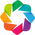

In [2]:
import holoviews as hv
from holoviews import opts
import xarray as xr
hv.extension('bokeh')

In [3]:
latent_dim = 1024
save_step = 80000 #
_batch_size = 1
img_size = 256
basename = "256_1024_HA_HAN_COPD"

In [4]:
class Image:
    def __init__(self, image_array):
        self.image_array=image_array
        self.xr=None
    def get_xr(self):
        if self.xr is not None:
            return self.xr
        else:
            self.xr=xr.Dataset({'image': (['x','y','z'], self.image_array)},
                      coords={
                          'x':np.arange(img_size),
                          'y':np.arange(img_size),
                          'z':np.arange(img_size)
                      })
            return self.xr
        
def plot_on_grid(image):
    hv_image = hv.Dataset(image.get_xr())
    layout = (hv_image.to(hv.Image, ['y', 'x'], groupby=['z'], dynamic=True).opts(tools=['hover'])
              + hv_image.to(hv.Image, ['z', 'x'], groupby=['y'], dynamic=True).opts(tools=['hover'])
              + hv_image.to(hv.Image, ['z', 'y'], groupby=['x'], dynamic=True).opts(tools=['hover']))

    layout.opts(
        opts.Image(width=300, height=300, cmap="gray"))
    return layout

def plot_pair(image1, image2):
    hv_image1 = hv.Dataset(image1.get_xr())
    hv_image2 = hv.Dataset(image2.get_xr())

    layout = (hv_image1.to(hv.Image, ['z', 'y'], groupby=['x'], label="Real", dynamic=True).opts(tools=['hover'])
              + hv_image2.to(hv.Image, ['z', 'y'], groupby=['x'], label="Reconstruction", dynamic=True).opts(tools=['hover']))
    
    layout.opts(
        opts.Image(width=300, height=300, cmap="gray"))
    #layout.axis.visible = False
    return layout

def plot_pair_coronal(image1, image2):
    hv_image1 = hv.Dataset(image1.get_xr())
    hv_image2 = hv.Dataset(image2.get_xr())
    
    layout = (hv_image1.to(hv.Image, ['z', 'x'], groupby=['y'], label="Real", dynamic=True).opts(tools=['hover'])
              + hv_image2.to(hv.Image, ['z', 'x'], groupby=['y'], label="Reconstruction", dynamic=True).opts(tools=['hover']))
   
    layout.opts(
        opts.Image(width=300, height=300, cmap="gray"))
    return layout

In [3]:
trainset = COPD_dataset(img_size=img_size, stage="eval", threshold=600)
train_loader = torch.utils.data.DataLoader(trainset,batch_size=_batch_size,drop_last=True,
                                              shuffle=False,num_workers=4)
dataloader_iterator = iter(train_loader)

Dataset size: 1000


In [13]:
G = Generator(noise=latent_dim, mode="eval")
E = Encoder()
Sub_E = Sub_Encoder(n_class=latent_dim)

ckpt_path = "./checkpoint/"+basename+"/G_iter"+str(save_step)+".pth"
ckpt = torch.load(ckpt_path)
ckpt = trim_state_dict_name(ckpt)
G.load_state_dict(ckpt)

ckpt_path = "./checkpoint/"+basename+"/E_iter"+str(save_step)+".pth"
ckpt = torch.load(ckpt_path)
ckpt = trim_state_dict_name(ckpt)
E.load_state_dict(ckpt)

ckpt_path = "./checkpoint/"+basename+"/Sub_E_iter"+str(save_step)+".pth"
ckpt = torch.load(ckpt_path)
ckpt = trim_state_dict_name(ckpt)
Sub_E.load_state_dict(ckpt)

print(save_step, "step weights loaded.")
del ckpt

G = G.cuda()
E = E.cuda()
Sub_E = Sub_E.cuda()

G.eval()
E.eval()
Sub_E.eval()

torch.cuda.empty_cache()

80000 step weights loaded.


## Random generation

In [30]:
with torch.no_grad():
    z_rand = Variable(torch.randn((_batch_size, latent_dim))).cuda()
    x_rand = G(z_rand,0) # dumb index 0, not used
    x_rand = x_rand.detach().cpu().numpy()
    x_rand = 0.5*x_rand+0.5 # rescale

    x_rand = x_rand[0,0,:,:,:]

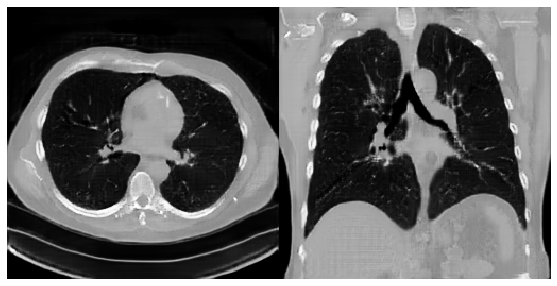

In [32]:
slice_idx = [127,120,101]
slice_x = np.flip(x_rand[slice_idx[0],:,:],0)
slice_y = np.flip(x_rand[:,slice_idx[1],:],0)
slice_z = np.flip(x_rand[:,:,slice_idx[2]],0)

result = np.concatenate([slice_x,slice_y],1)
plt.figure(figsize=(10,5))
plt.imshow(result, cmap="gray")
plt.axis('off')
plt.show()

## Zoom-in region

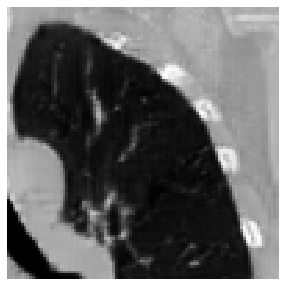

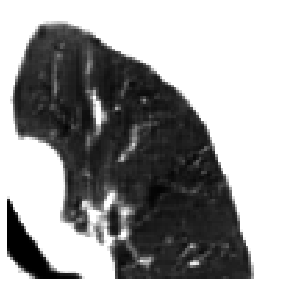

In [36]:
plt.figure(figsize=(5,5))
plt.imshow(slice_y[10:128-20,128:-30], cmap="gray")
plt.axis('off')
plt.show()

slice_y_threshold = slice_y[10:128-20,128:-30].copy()
slice_y_threshold = np.clip(slice_y_threshold, 0., (-250+1024)/(600+1024))

plt.figure(figsize=(5,5))
plt.imshow(slice_y_threshold, cmap="gray")
plt.axis('off')
plt.show()

## Reconstruction

In [8]:
x_real = next(dataloader_iterator)
real_image = 0.5*x_real.numpy()+0.5
real_image = real_image[0,0,:,:,:]

In [36]:
with torch.no_grad():
    x_real = x_real.float().cuda()
    z_hat = E(x_real)
    sub_z_hat = Sub_E(z_hat)

In [37]:
with torch.no_grad():
    x_hat = G(sub_z_hat,0)
    x_hat = x_hat.detach().cpu().numpy()
    x_hat = 0.5*x_hat+0.5
    x_hat = x_hat[0,0,:,:,:]

### Reconstructed image

In [38]:
x_hat = (x_hat*255).astype(np.int16)
img = nib.Nifti1Image(x_hat.transpose((2,1,0)),affine = np.eye(4))
nib.save(img, "results/x_hat_5_lung.nii.gz")

real_image = (real_image*255).astype(np.int16)
img = nib.Nifti1Image(real_image.transpose((2,1,0)),affine = np.eye(4))
nib.save(img, "results/x_real_5_lung.nii.gz")

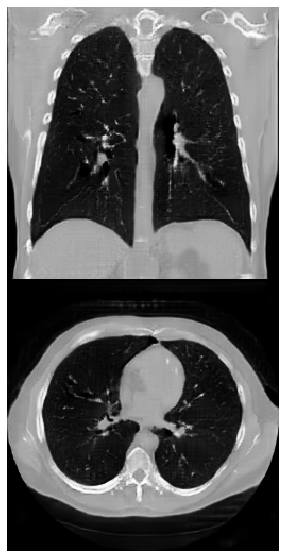

In [15]:
slice_idx = [127,110,90]
slice_x = np.flip(x_hat[slice_idx[0],:,:],0)
slice_y = np.flip(x_hat[:,slice_idx[1],:],0)
slice_z = np.flip(x_hat[:,:,slice_idx[2]],0)

result = np.concatenate([slice_y,slice_x],0)
plt.figure(figsize=(5,10))
plt.imshow(result, cmap="gray")
plt.axis('off')
plt.show()

### Real image

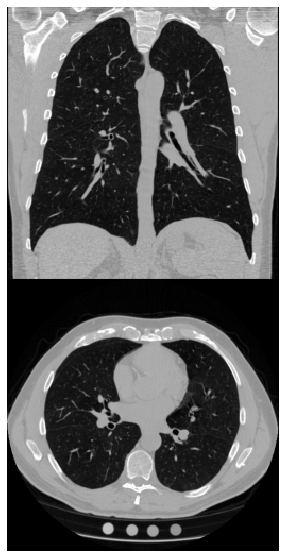

In [16]:
slice_idx = [127,110,90]
slice_x = np.flip(real_image[slice_idx[0],:,:],0)
slice_y = np.flip(real_image[:,slice_idx[1],:],0)
slice_z = np.flip(real_image[:,:,slice_idx[2]],0)

result = np.concatenate([slice_y,slice_x],0)
plt.figure(figsize=(5,10))
plt.imshow(result, cmap="gray")
plt.axis('off')
plt.show()

### Qualitative evaluation

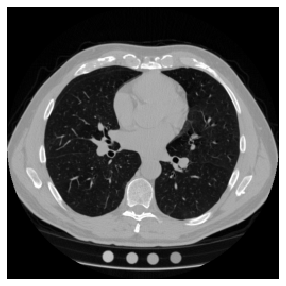

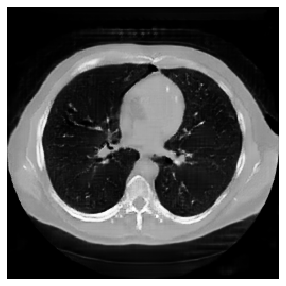

In [141]:
slice_idx = 127
real_image_slice = np.flip(real_image[slice_idx,:,:],0)
x_hat_slice = np.flip(x_hat[slice_idx,:,:],0)

plt.figure(figsize=(5,5))
plt.imshow(real_image_slice, cmap="gray")
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(x_hat_slice, cmap="gray")
plt.axis('off')
plt.show()

### Quantitative evaluation

In [6]:
print("SSIM:", structural_similarity(real_image, x_hat, data_range=1.))
print("MSE:", mean_squared_error(real_image, x_hat))

SSIM: 0.5668714605310148
MSE: 0.05792183015212249
